### Investigation - Attempt 1

Looking for nice statistical patterns or distributions of data, using raw data from the CSO. 

This is just a rough investigation, as I have not finalized my intentions for this project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Investigation - SEC Data

#### Leaving Cert Ordinary Level Maths

I put some of the unwieldy data into a csv file. 2018 Leaving Cert Higher, Ordinary and Foundation Level results by gender, in Maths and English, are printed and investigated below. 

In [3]:
df = pd.read_csv('data/2018lc-math-english.csv')
y = df.loc[8:15]
y

,Grade,Level,2018-total-maths,2018-female-maths,2018-male-maths,2018-total-eng,2018-female-eng,2018-male-eng
8,1,O,482,314,168,214.0,123.0,91.0
9,2,O,3392,1979,1413,1190.0,634.0,556.0
10,3,O,6484,3524,2960,3086.0,1402.0,1684.0
11,4,O,7551,3981,3570,4163.0,1707.0,2456.0
12,5,O,6348,3260,3088,3328.0,1194.0,2134.0
13,6,O,4062,1948,2114,1811.0,539.0,1272.0
14,7,O,1870,868,1002,667.0,172.0,495.0
15,8,O,1147,436,711,294.0,53.0,241.0


In [4]:
hge = pd.DataFrame(y.loc[:,'2018-female-maths'])
hme = pd.DataFrame(y.loc[:,'2018-male-maths'])
grade = np.array(y.loc[:, 'Grade'])

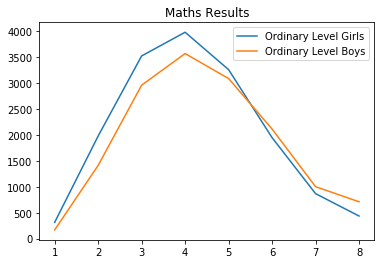

In [5]:
plt.title('Maths Results')
plt.plot(grade, hge, label = 'Ordinary Level Girls')
plt.plot(grade, hme, label = 'Ordinary Level Boys')
plt.legend()
plt.show()

In [6]:
totalgirl = np.sum(hge)
totalgirl

2018-female-maths    16310
dtype: int64

In [7]:
totalboy = np.sum(hme)
totalboy

2018-male-maths    15026
dtype: int64

In [12]:
bestpupil = y.loc[:, '2018-total-maths']
sum_total = np.sum(bestpupil)
sum_total

31336

In [13]:
print(bestpupil/sum_total*100)

8      1.538167
9     10.824611
10    20.691856
11    24.096885
12    20.257850
13    12.962727
14     5.967577
15     3.660327
Name: 2018-total-maths, dtype: float64


In [15]:
print('Percentage of Students Awarded an O4 or higher grade: ',1.538167+10.824611+20.691856+24.096885)

Percentage of Students Awarded an O4 or higher grade:  57.151519


In [14]:
x = np.arange(0, 8)
bestgirl = (hge.iloc[x])
print(bestgirl/totalgirl*100)

    2018-female-maths
8            1.925199
9           12.133660
10          21.606376
11          24.408338
12          19.987738
13          11.943593
14           5.321888
15           2.673207


In [16]:
print('Percentage of Female Students Awarded an O4 or higher grade: ', 1.925199+12.133660+21.606376+24.408338)

Percentage of Female Students Awarded an O4 or higher grade:  60.073573


In [17]:
bestboy = (hme.iloc[x])
print(bestboy/totalboy*100)

    2018-male-maths
8          1.118062
9          9.403700
10        19.699188
11        23.758818
12        20.551045
13        14.068947
14         6.668441
15         4.731798


In [18]:
print('Percentage of Students Awarded an O4or higher grade: ', 1.118062+9.403700+19.699188+23.758818)

Percentage of Students Awarded an O4or higher grade:  53.97976800000001


In [19]:
grade_nums = np.arange(1, 9)
grade_nums

array([1, 2, 3, 4, 5, 6, 7, 8])

As the data I have here, is ordinal and categorical, I can't calculate the mean. From my percentages above, and the fact my data is ordered by descending grade awards, I can see that the median grade for both female and male is an O4.

In this year approximately 57% of students were awarded an O4 or higher grade. 60% of female students received 04 or higher grades, and 54% of male students. 

From my research, I know that assessment grades are often normally distributed. If I assume that the set of Leaving Cert Results is normally distributed, then I would expect my mean, median and mode to have very similar values. In a perfect normal distribution they would be the same, but that would be unlikely to be the case here. So I can use the median to make inferences about a possible mean, and use this to generate normally distributed data.


## Simulating Data

In [46]:
# Generate random female results with mean in the high O4 interval
sim_girls = np.round(np.random.normal(340, 100, 100), decimals = 0)
sim_girls = np.clip(sim_girls, 0, 600)
#Generate random male results with mean in the low O4 interval
sim_boys = np.round(np.random.normal(315, 100, 100), decimals = 0)
sim_boys = np.clip(sim_boys, 0, 600)


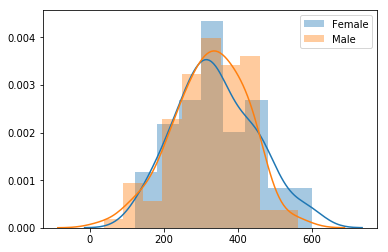

In [47]:
#Graphically display data to look for errors
#Such as results over 600 or under 0
# No fails etc.
sns.distplot(sim_girls, label = 'Female');
sns.distplot(sim_boys, label = 'Male');
plt.legend();


In [48]:
#Adding simulated data to data frame, and then combining in same column
df = pd.DataFrame(sim_girls, columns=['Result'])
df2 = pd.DataFrame(sim_boys, columns=['Result']);
df = df.append(df2, ignore_index=True)

In [50]:
c = pd.cut(
    df.stack(),
    [0, 180, 240, 300, 360,  420, 480, 540, 600],
    labels=['08', 'O7', 'O6', 'O5', 'O4', 'O3', 'O2', 'O1']
)
df2 = df.join(c.unstack().add_suffix('_grade'))

In [52]:
# Generating dfs with 100 repeated strings, first female, then male
string_female = pd.DataFrame(['female']*100)
string_male = pd.DataFrame(['male']*100)
# Combining both dfs to the same df column
gender = string_female.append(string_male, ignore_index=True)

In [53]:
# Adding gender col to existing df
df['Gender'] = gender

In [54]:
df

,Result,Gender
0,303.0,female
1,365.0,female
2,463.0,female
3,122.0,female
4,323.0,female
5,237.0,female
6,336.0,female
7,588.0,female
8,305.0,female
9,267.0,female


In [58]:
pd.merge(df, df2, on="Result")

,Result,Gender,Result_grade
0,303.0,female,O5
1,365.0,female,O4
2,463.0,female,O3
3,122.0,female,08
4,122.0,female,08
5,122.0,male,08
6,122.0,male,08
7,323.0,female,O5
8,323.0,female,O5
9,323.0,female,O5
